<a href="https://colab.research.google.com/github/Aayushi1111/Adobe_Gensolve-solutions/blob/main/FinalCopy_of_FakeNewsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Problem

![image.png](attachment:image.png)

# Importing Libraries and Datasets

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
!pip install jupyterthemes
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_true = pd.read_csv("/content/Fake (1).csv")
df_fake= pd.read_csv("/content/True (1).csv")


MINI CHALLENGE #1:
- Indicate how many data samples do we have per class (i.e.: Fake and True)
- List how many Null element are present and the memory usage for each dataframe

In [ ]:
df_true

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23866  McPain: John McCain Furious That Iran Treated ...   
23867  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23868  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23869  How to Blow $700 Million: Al Jazeera America F...   
23870  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23866  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23867  21st Century Wire says It s a familiar theme. ...  Middle-east   
23868  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23869  21st Century Wire says Al Jazeera America will...  Middle-east   
23870  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23866   January 16, 2016  
23867   January 16, 2016  
23868   January 15, 2016  
23869   January 14, 2016  
23870   January 12, 2016  

[23871 rows x 4 columns]

In [ ]:
df_fake

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [ ]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_true.shape

(23871, 4)

In [ ]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23871 entries, 0 to 23870
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23871 non-null  object
 1   text     23871 non-null  object
 2   subject  23871 non-null  object
 3   date     23871 non-null  object
dtypes: object(4)
memory usage: 746.1+ KB


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
# add a target class column to indicate whether the news is real or fake
df_true['isfake'] = 1
df_true.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  isfake  
0  December 31, 2017       1  
1  December 31, 2017       1  
2  December 30, 2017       1  
3  December 29, 2017       1  
4  December 25, 2017       1

In [ ]:
df_fake['isfake'] = 0
df_fake.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  isfake  
0  December 31, 2017        0  
1  December 29, 2017        0  
2  December 31, 2017        0  
3  December 30, 2017        0  
4  December 29, 2017        0

In [ ]:
# Concatenate Real and Fake News
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
45283  'Fully committed' NATO backs new U.S. approach...   
45284  LexisNexis withdrew two products from Chinese ...   
45285  Minsk cultural hub becomes haven from authorities   
45286  Vatican upbeat on possibility of Pope Francis ...   
45287  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
45283  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
45284  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
45285  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
45286  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
45287  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                    date  isfake  
0      December 31, 2017       1  
1      December 31, 2017       1  
2      December 30, 2017       1  
3      December 29, 2017       1  
4      December 25, 2017       1  
...                  ...     ...  
45283   August 22, 2017        0  
45284   August 22, 2017        0  
45285   August 22, 2017        0  
45286   August 22, 2017        0  
45287   August 22, 2017        0  

[45288 rows x 5 columns]

In [ ]:
# drpo unnecessary Date column # RUN ONLY ONCE
df.drop(columns = ['date'], inplace = True)

In [ ]:
# combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  isfake  \
0  Donald Trump just couldn t wish all Americans ...    News       1   
1  House Intelligence Committee Chairman Devin Nu...    News       1   
2  On Friday, it was revealed that former Milwauk...    News       1   
3  On Christmas day, Donald Trump announced that ...    News       1   
4  Pope Francis used his annual Christmas Day mes...    News       1   

                                            original  
0   Donald Trump Sends Out Embarrassing New Year’...  
1   Drunk Bragging Trump Staffer Started Russian ...  
2   Sheriff David Clarke Becomes An Internet Joke...  
3   Trump Is So Obsessed He Even Has Obama’s Name...  
4   Pope Francis Just Called Out Donald Trump Dur...

In [ ]:
df['original'][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

# TASK #4: PERFORM DATA CLEANING

In [ ]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # add additional stop words to remove

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Show original news
df['original'][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

In [ ]:
# Replace NaN with empty strings in 'original'
df['original'] = df['original'].fillna('')

# Verify there are no NaN values
print("Number of NaN in 'original':", df['original'].isna().sum())


Number of NaN in 'original': 0


In [ ]:
# Preprocessing function
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result


# Apply preprocessing
df['clean'] = df['original'].apply(preprocess)


In [ ]:
df_true['title'] = df_true['title'].fillna('')
df_true['text'] = df_true['text'].fillna('')
df_fake['title'] = df_fake['title'].fillna('')
df_fake['text'] = df_fake['text'].fillna('')
df['original'] = (df['title'] + ' ' + df['text']).fillna('')
print(df[['original', 'clean']].head())


                                            original  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                               clean  
0  [donald, trump, sends, embarrassing, year, mes...  
1  [drunk, bragging, trump, staffer, started, rus...  
2  [sheriff, david, clarke, internet, joke, threa...  
3  [trump, obsessed, obama, coded, website, image...  
4  [pope, francis, called, donald, trump, christm...  


In [ ]:
import pandas as pd
import gensim
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Define stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])  # Add custom stopwords

# Preprocessing function
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
    return result

# Load datasets
df_true = pd.read_csv("/content/Fake (1).csv")
df_fake = pd.read_csv("/content/True (1).csv")

# Add target labels
df_true['isfake'] = 1  # Real news
df_fake['isfake'] = 0  # Fake news

# Concatenate both datasets
df = pd.concat([df_true, df_fake]).reset_index(drop=True)

# Drop unnecessary columns
if 'date' in df.columns:
    df.drop(columns=['date'], inplace=True)

# Combine 'title' and 'text' into a single column 'original'
df['original'] = df['title'] + ' ' + df['text']

# Replace NaN values in 'original' with empty strings
df['original'] = df['original'].fillna('')

# Verify there are no NaN values left in 'original'
print("Number of NaN in 'original':", df['original'].isna().sum())

# Apply preprocessing to 'original' and store in 'clean'
df['clean'] = df['original'].apply(preprocess)

# Verify that 'clean' column is populated correctly
print(df[['original', 'clean']].head())

# Check for rows where preprocessing might fail
problematic_rows = []
for idx, text in enumerate(df['original']):
    try:
        preprocess(text)
    except Exception as e:
        problematic_rows.append((idx, text, e))

# If there are any problematic rows, display them
if problematic_rows:
    print("Problematic rows:")
    for idx, text, error in problematic_rows:
        print(f"Row {idx}: {text} - Error: {error}")
else:
    print("No problematic rows found.")

# Optional: Check the first few rows of cleaned text for Real news
print("\nSample Real news (isfake == 1):")
print(df[df.isfake == 1].clean.head())

# Optional: Count non-empty rows in 'clean' for Real news
non_empty_real = df[df.isfake == 1].clean.apply(len).gt(0).sum()
print(f"Non-empty rows for Real news: {non_empty_real}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of NaN in 'original': 0
                                            original  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                               clean  
0  [donald, trump, sends, embarrassing, year, mes...  
1  [drunk, bragging, trump, staffer, started, rus...  
2  [sheriff, david, clarke, internet, joke, threa...  
3  [trump, obsessed, obama, coded, website, image...  
4  [pope, francis, called, donald, trump, christm...  
No problematic rows found.

Sample Real news (isfake == 1):
0    [donald, trump, sends, embarrassing, year, mes...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, internet, joke, threa...
3    [trump, obsessed, obama, coded, website, image...
4    [pope, francis, c

In [ ]:
# Reapply preprocessing
df['clean'] = df['original'].apply(preprocess)

# Check a few rows of the 'clean' column
print(df['clean'].head())


0    [donald, trump, sends, embarrassing, year, mes...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, internet, joke, threa...
3    [trump, obsessed, obama, coded, website, image...
4    [pope, francis, called, donald, trump, christm...
Name: clean, dtype: object


In [ ]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  isfake  \
0  Donald Trump just couldn t wish all Americans ...    News       1   
1  House Intelligence Committee Chairman Devin Nu...    News       1   
2  On Friday, it was revealed that former Milwauk...    News       1   
3  On Christmas day, Donald Trump announced that ...    News       1   
4  Pope Francis used his annual Christmas Day mes...    News       1   

                                            original  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                               clean  
0  [donald, trump, sends, embarrassing, year, mes...  
1  [drunk, bragging, trump, staffer, started, rus...  
2  [sheriff, david, clarke, internet, joke, threa...  
3  [trump, obsessed, obama, coded, website, image...  
4  [pope, francis, called, donald, trump, christm...

In [ ]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)


In [ ]:
list_of_words

['donald',
 'trump',
 'sends',
 'embarrassing',
 'year',
 'message',
 'disturbing',
 'donald',
 'trump',
 'wish',
 'americans',
 'happy',
 'year',
 'leave',
 'instead',
 'shout',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'reality',
 'star',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'year',
 'president',
 'angry',
 'pants',
 'tweeted',
 'great',
 'year',
 'america',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'year',
 'great',
 'year',
 'america',
 'donald',
 'trump',
 'realdonaldtrump',
 'december',
 'trump',
 'tweet',
 'went',
 'welll',
 'expect',
 'kind',
 'president',
 'sends',
 'year',
 'greeting',
 'like',
 'despicable',
 'petty',
 'infantile',
 'gibberish',
 'trum

In [ ]:
len(list_of_words)

9357151

In [ ]:
# Obtain the total number of unique words (using set())
total_words = len(list(set(list_of_words)))
total_words

108704

In [ ]:
# join the words into a string (words seperated by " ")
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [ ]:
df

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
45283  'Fully committed' NATO backs new U.S. approach...   
45284  LexisNexis withdrew two products from Chinese ...   
45285  Minsk cultural hub becomes haven from authorities   
45286  Vatican upbeat on possibility of Pope Francis ...   
45287  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  isfake  \
0      Donald Trump just couldn t wish all Americans ...       News       1   
1      House Intelligence Committee Chairman Devin Nu...       News       1   
2      On Friday, it was revealed that former Milwauk...       News       1   
3      On Christmas day, Donald Trump announced that ...       News       1   
4      Pope Francis used his annual Christmas Day mes...       News       1   
...                                                  ...        ...     ...   
45283  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews       0   
45284  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews       0   
45285  MINSK (Reuters) - In the shadow of disused Sov...  worldnews       0   
45286  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews       0   
45287  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews       0   

                                                original  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
45283  'Fully committed' NATO backs new U.S. approach...   
45284  LexisNexis withdrew two products from Chinese ...   
45285  Minsk cultural hub becomes haven from authorit...   
45286  Vatican upbeat on possibility of Pope Francis ...   
45287  Indonesia to buy $1.14 billion worth of Russia...   

                                                   clean  \
0      [donald, trump, sends, embarrassing, year, mes...   
1      [drunk, bragging, trump, staffer, started, rus...   
2      [sheriff, david, clarke, internet, joke, threa...   
3      [trump, obsessed, obama, coded, website, image...   
4      [pope, francis, called, donald, trump, christm...   
...                                                  ...   
45283  [fully, committed, nato, backs, approach, afgh...   
45284  [lexisnexis, withdrew, products, chinese, mark...   
45285  [minsk, cultural, authorities, minsk, reuters,...   
45286  [vatican, upbeat, possibility, pope, francis, ...   
45287  [indonesia, billion, worth, russian, jets, jak...   

                                            clean_joined  
0      donald trump sends embarrassing year message d...  
1      drunk bragging trump staffer started russian c...  
2      sheriff david clarke internet joke threatening...  
3      trump obsessed obama coded website images chri...  
4      pope francis called donald trump christmas spe...  
...                                                  ...  
45283  fully committed nato backs approach afghanista...  
45284  lexisnexis withdrew products chinese market lo...  
45285  minsk cultural authorities minsk reuters shado...  
45286  vatican upbeat possibility pope francis visiti...  
45287  indonesia billion worth russian jets jakarta r...  

[45288 rows x 7 columns]

In [ ]:
df['clean_joined'][0]

'donald trump sends embarrassing year message disturbing donald trump wish americans happy year leave instead shout enemies haters dishonest fake news media reality star country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year great year america donald trump realdonaldtrump december trump tweet went welll expect kind president sends year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizens happy year bishop talbert swan talbertswan december likes calvin calvinstowell december impeachment great year america accept regaining control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval alansandoval december uses word haters years wish m

# TASK #5: VISUALIZE CLEANED UP DATASET

In [ ]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  isfake  \
0  Donald Trump just couldn t wish all Americans ...    News       1   
1  House Intelligence Committee Chairman Devin Nu...    News       1   
2  On Friday, it was revealed that former Milwauk...    News       1   
3  On Christmas day, Donald Trump announced that ...    News       1   
4  Pope Francis used his annual Christmas Day mes...    News       1   

                                            original  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                               clean  \
0  [donald, trump, sends, embarrassing, year, mes...   
1  [drunk, bragging, trump, staffer, started, rus...   
2  [sheriff, david, clarke, internet, joke, threa...   
3  [trump, obsessed, obama, coded, website, image...   
4  [pope, francis, called, donald, trump, christm...   

                                        clean_joined  
0  donald trump sends embarrassing year message d...  
1  drunk bragging trump staffer started russian c...  
2  sheriff david clarke internet joke threatening...  
3  trump obsessed obama coded website images chri...  
4  pope francis called donald trump christmas spe...

<Axes: xlabel='count', ylabel='subject'>

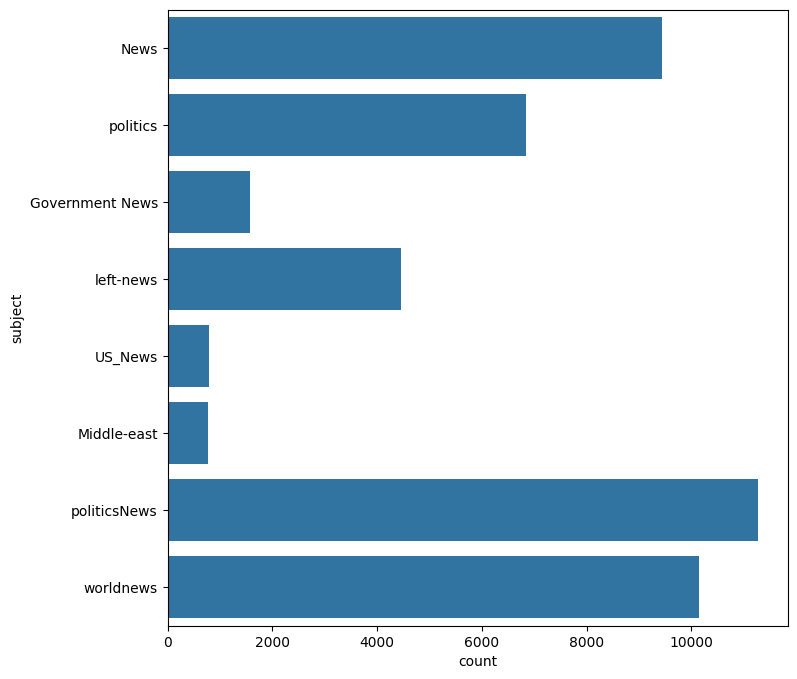

In [ ]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

MINI CHALLENGE #3:
- Plot the count plot for fake vs. true news

<Axes: xlabel='count', ylabel='isfake'>

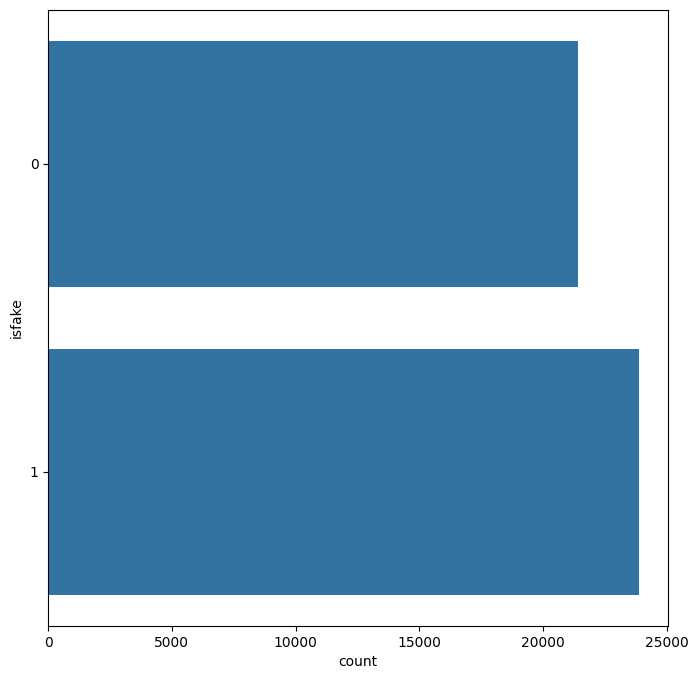

In [ ]:
# plot the number of samples in 'isfake'
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = df)

In [ ]:
df_true.shape

(23871, 5)

In [ ]:
print("First few rows of df_true:")
print(df_true.head())

print("Columns in df_true:")
print(df_true.columns)


First few rows of df_true:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  isfake  
0  December 31, 2017       1  
1  December 31, 2017       1  
2  December 30, 2017       1  
3  December 29, 2017       1  
4  December 25, 2017       1  
Columns in df_true:
Index(['title', 'text', 'subject', 'date', 'i

In [ ]:
# Check the distribution of the 'isfake' column
print("Value counts for 'isfake':")
print(df['isfake'].value_counts())

# Check sample rows for real news
print("Sample rows for Real News (isfake == 1):")
print(df[df.isfake == 1][['title', 'text', 'original']].head())


Value counts for 'isfake':
isfake
1    23871
0    21417
Name: count, dtype: int64
Sample rows for Real News (isfake == 1):
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes...   

                                            original  
0   Donald Trump Sends Out Embarrassing New Year’...  
1   Drunk Bragging Trump Staffer Started Russian ...  
2   Sheriff David Clarke Becomes An In

In [ ]:
# Check the first few rows of 'clean_joined' for Real news
print(df[df.isfake == 1].clean_joined.head())

# Count non-empty rows in 'clean_joined' for Real news
print("Non-empty rows for Real news:", df[df.isfake == 1].clean_joined.str.strip().str.len().gt(0).sum())


0    donald trump sends embarrassing year message d...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke internet joke threatening...
3    trump obsessed obama coded website images chri...
4    pope francis called donald trump christmas spe...
Name: clean_joined, dtype: object
Non-empty rows for Real news: 23871


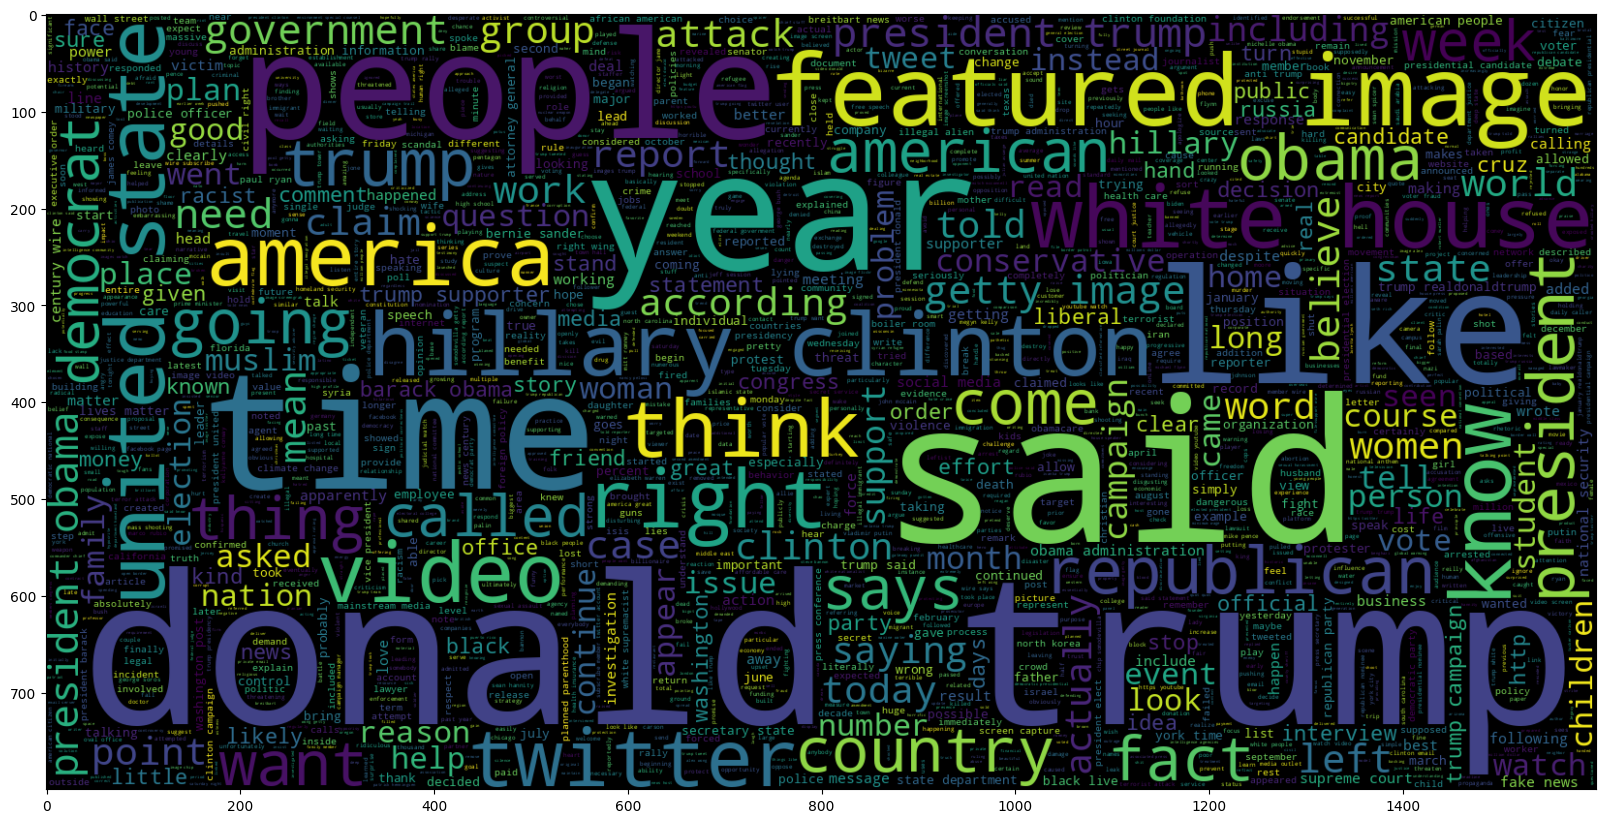

In [ ]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

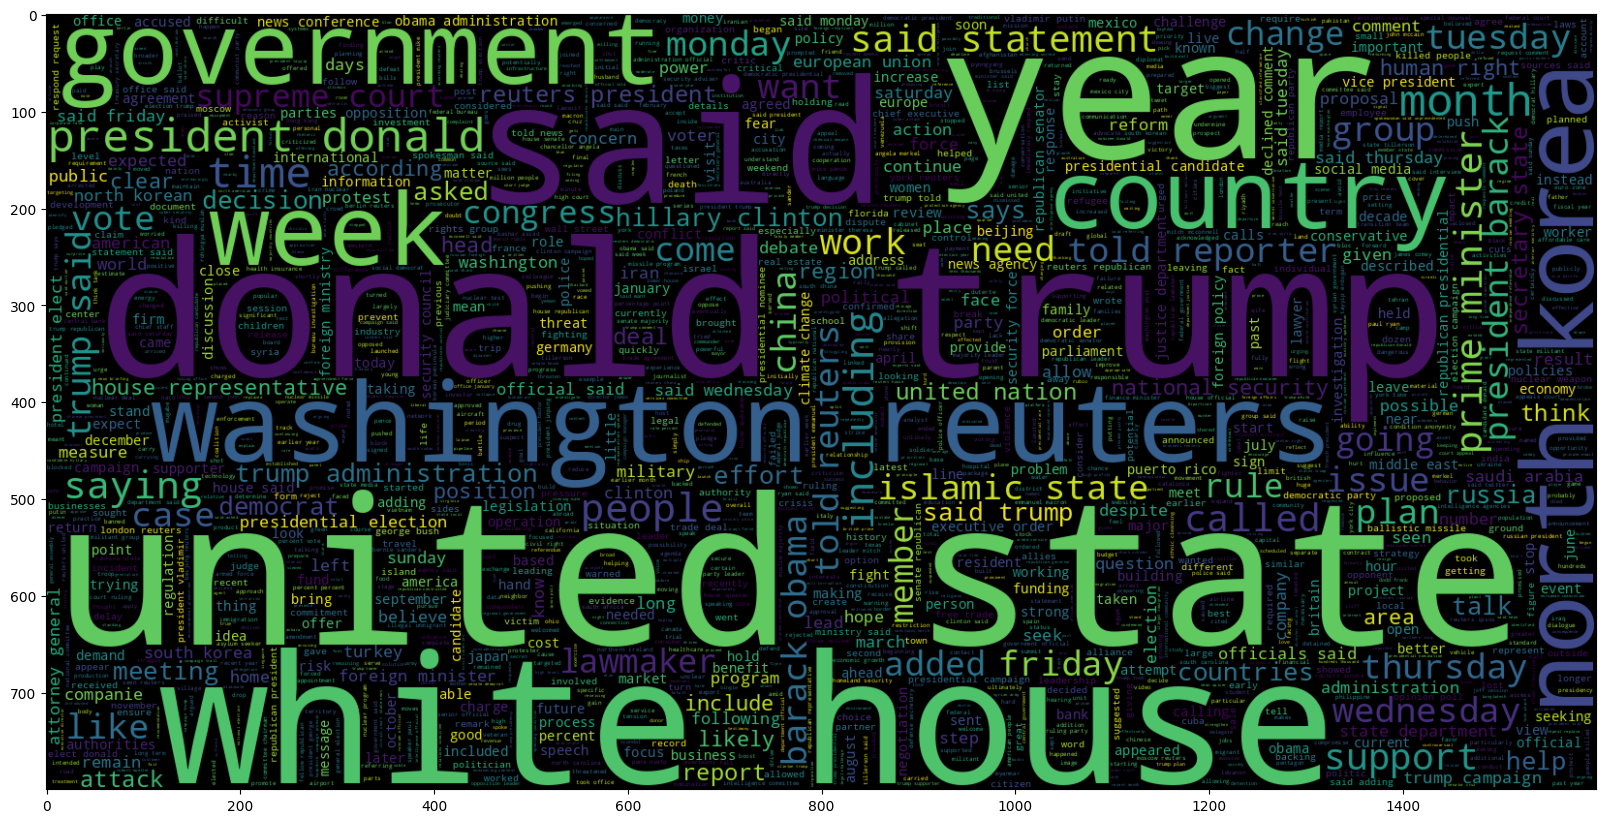

In [ ]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
# return all the tokens (each and every single word) as an array of tokens
import nltk
nltk.download('punkt_tab')
nltk.word_tokenize(df['clean_joined'][1])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['drunk',
 'bragging',
 'trump',
 'staffer',
 'started',
 'russian',
 'collusion',
 'investigation',
 'house',
 'intelligence',
 'committee',
 'chairman',
 'devin',
 'nunes',
 'going',
 'assumption',
 'like',
 'christopher',
 'steele',
 'dossier',
 'prompted',
 'russia',
 'investigation',
 'lashing',
 'department',
 'justice',
 'order',
 'protect',
 'trump',
 'happens',
 'dossier',
 'started',
 'investigation',
 'according',
 'documents',
 'obtained',
 'york',
 'times',
 'trump',
 'campaign',
 'adviser',
 'george',
 'papadopoulos',
 'drunk',
 'wine',
 'revealed',
 'knowledge',
 'russian',
 'opposition',
 'research',
 'hillary',
 'clinton',
 'papadopoulos',
 'covfefe',
 'trump',
 'administration',
 'alleged',
 'larger',
 'role',
 'damning',
 'drunken',
 'fool',
 'wine',
 'coffee',
 'boys',
 'help',
 'arrange',
 'york',
 'meeting',
 'trump',
 'president',
 'abdel',
 'fattah',
 'sisi',
 'egypt',
 'months',
 'election',
 'known',
 'aide',
 'meetings',
 'world',
 'leaders',
 'trump',
 'team

In [ ]:
# length of maximum document will be needed to create word embeddings
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [ ]:
# visualize the distribution of number of words in a text
import plotly.express as px #interactive visualizations
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

# TASK #6: PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

In [ ]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)

In [ ]:
from nltk import word_tokenize

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)


In [ ]:
len(train_sequences)

36230

In [ ]:
len(test_sequences)

9058

In [ ]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 donald trump sends embarrassing year message disturbing donald trump wish americans happy year leave instead shout enemies haters dishonest fake news media reality star country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year great year america donald trump realdonaldtrump december trump tweet went welll expect kind president sends year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizens happy year bishop talbert swan talbertswan december likes calvin calvinstowell december impeachment great year america accept regaining control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval alansandoval december use

In [ ]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
# Make sure all different samples have the same length (fillted 0 s for missing)
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [ ]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [12525     1   846   990  6823   112   139 16364  7234  1102  4831   464
  1188  6444    22  2815   760    28  2384  1725 32572  9262  1721 21880
 12525     3     1   323   112   116   375    46  2191 12832  2757   708
 21880 12525  3065     1]
The padded encoding for document 2  is :  [ 375  114    1  264 1186 1898  609 1765   20  385  825 1440 1382  962
 3371  239 1089  904 1712  238  614 1643 1898  609  372  962  455 1429
  375 3371   14  242  895 7894 3525 6245  375 1136  354  389]


# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LSTM


# TASK #9: BUILD AND TRAIN THE MODEL

In [ ]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128))) # no of neurons

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid')) # reason: we do binary classification here
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
total_words

108704

In [ ]:
y_train = np.asarray(y_train)

In [ ]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
510/510 ━━━━━━━━━━━━━━━━━━━━ 225s 429ms/step - acc: 0.9543 - loss: 0.1108 - val_acc: 0.9983 - val_loss: 0.0054
Epoch 2/2
510/510 ━━━━━━━━━━━━━━━━━━━━ 275s 455ms/step - acc: 0.9996 - loss: 0.0020 - val_acc: 0.9967 - val_loss: 0.0156


# TASK #9: ASSESS TRAINED MODEL PERFORMANCE


In [ ]:
# make prediction
pred = model.predict(padded_test)

284/284 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step


In [ ]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [ ]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9960256127180394


<Axes: >

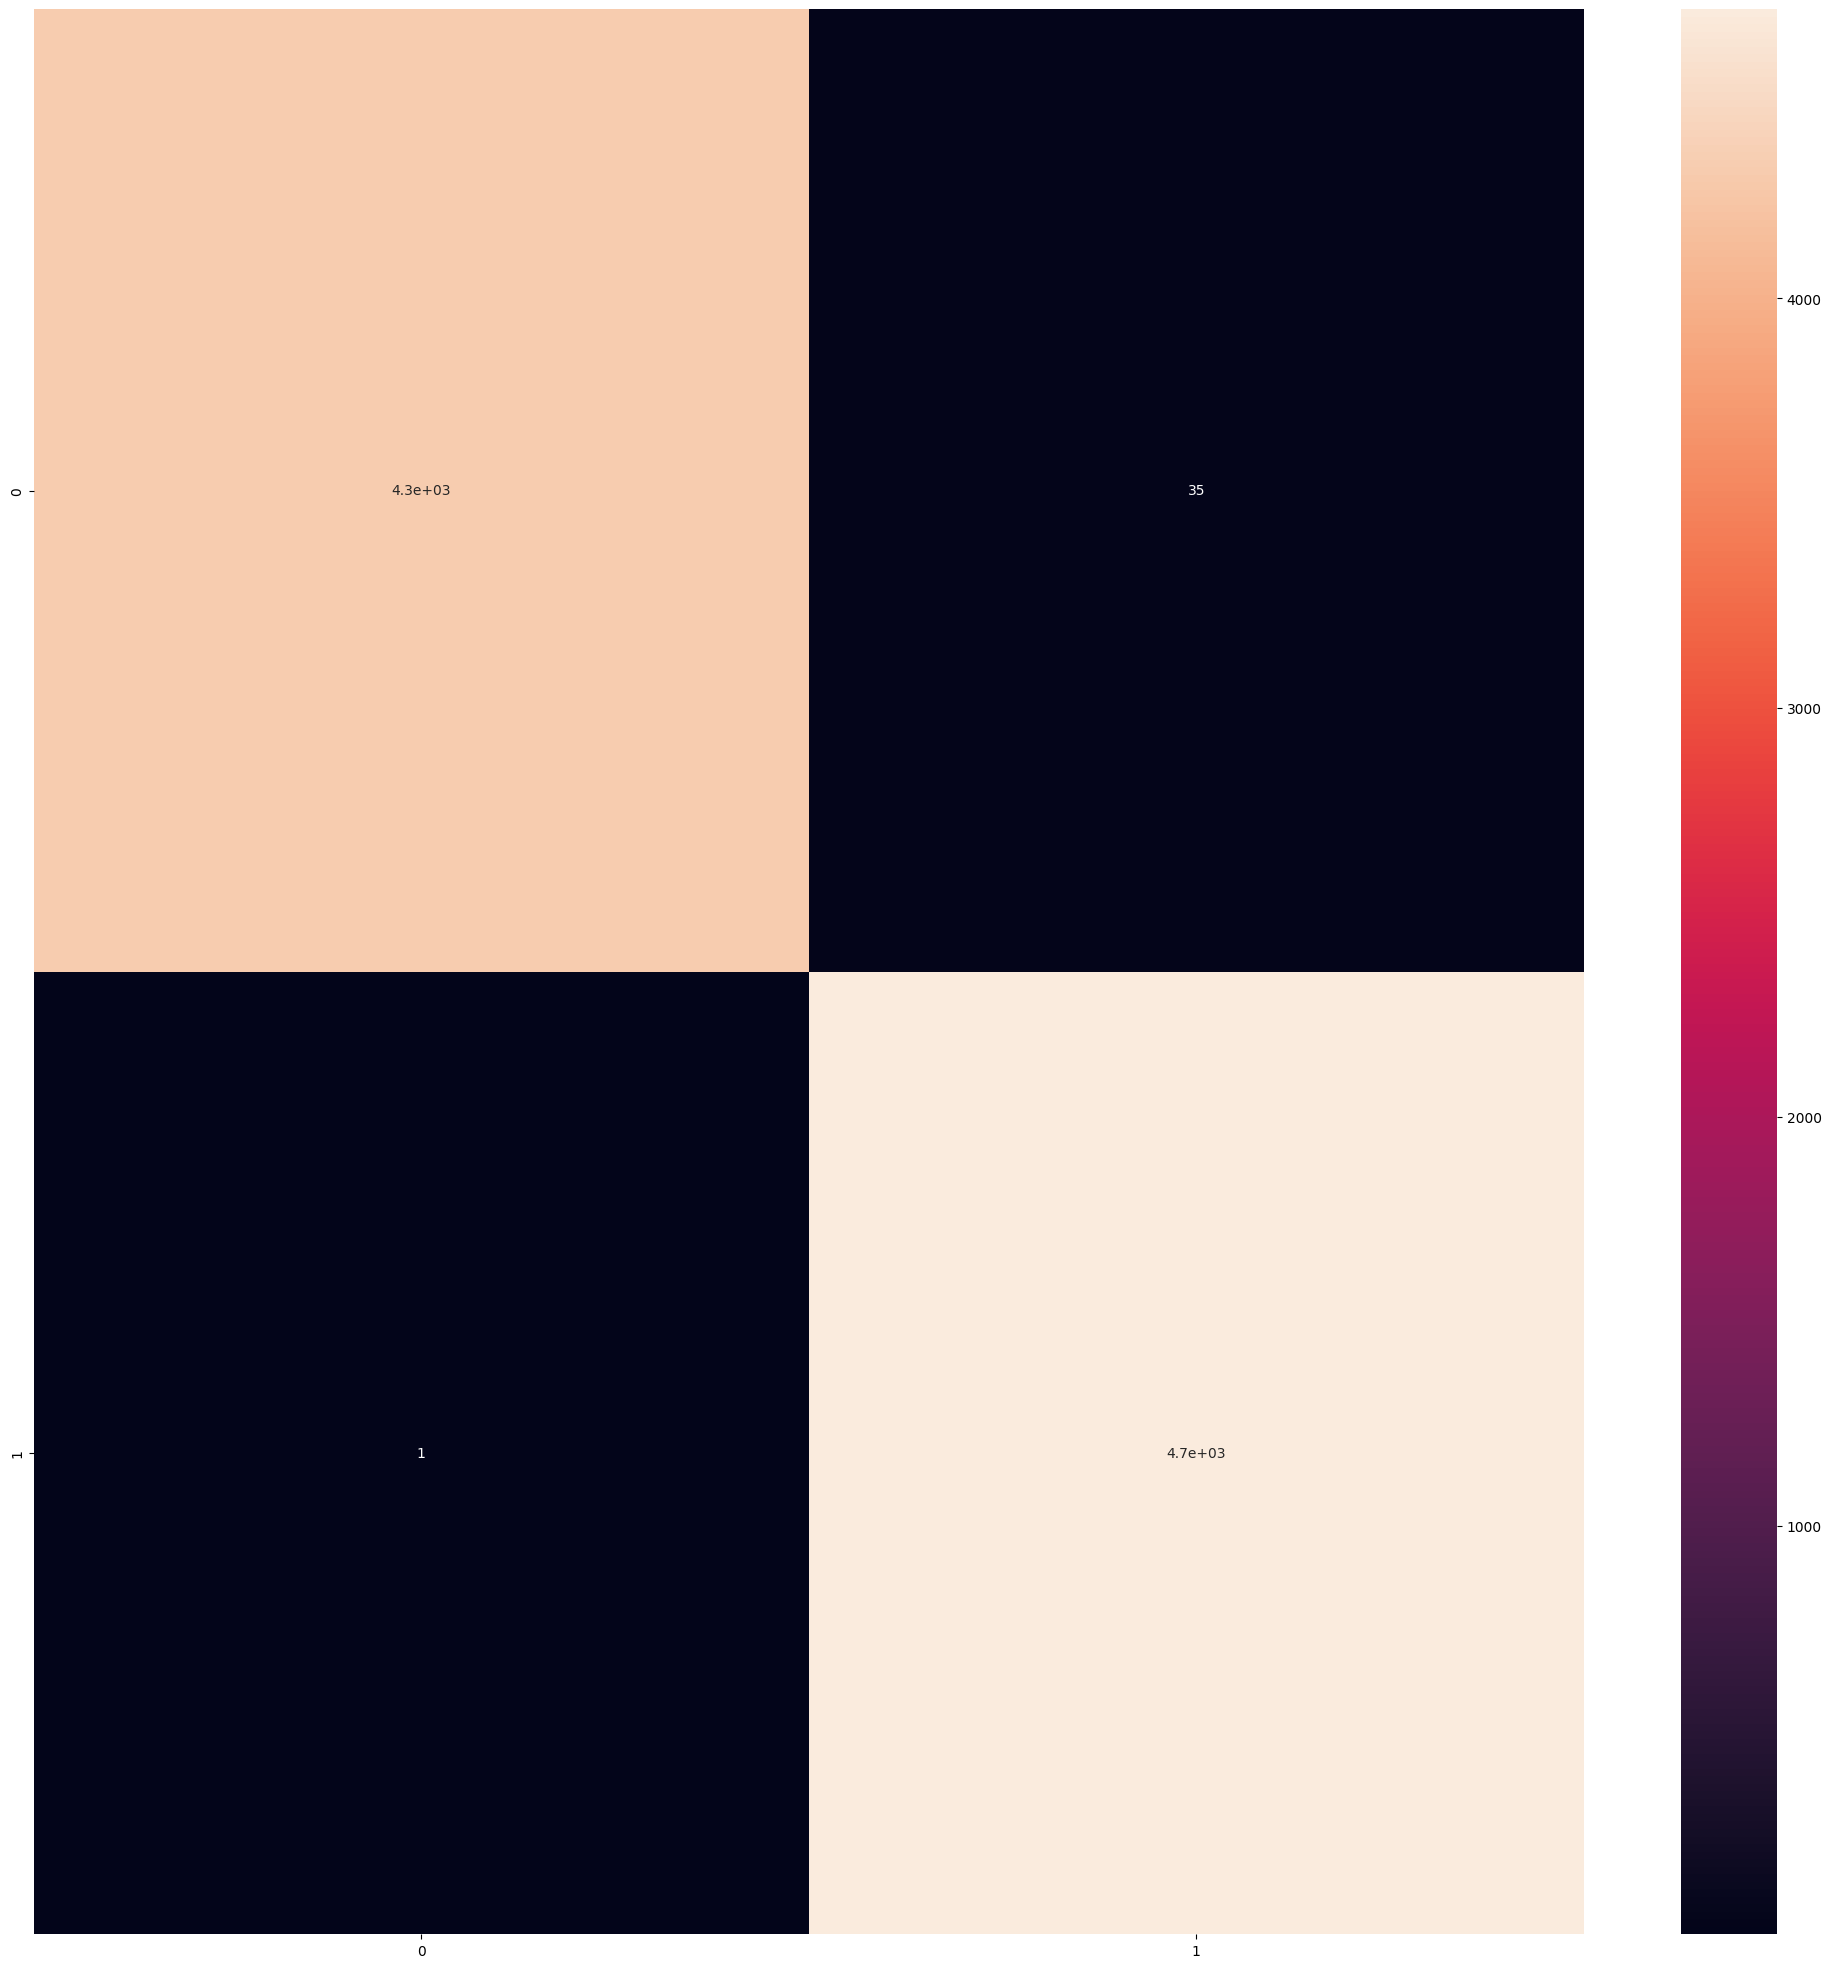

In [ ]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
# category dict
category = { 0: 'Fake News', 1 : "Real News"}

In [ ]:
import pickle

# Save the trained model to a file
with open('fake_news_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Load the trained model from the file
with open('fake_news_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
# Making predictions with the loaded model
pred = loaded_model.predict(padded_test)

# Post-process predictions to get binary classification (0 or 1)
prediction = [1 if p.item() > 0.5 else 0 for p in pred]

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(list(y_test), prediction)
print("Model Accuracy after loading: ", accuracy)


284/284 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step
Model Accuracy after loading:  0.9960256127180394


In [ ]:
print("True News samples:", len(df_true))
print("Fake News samples:", len(df_fake))


True News samples: 23871
Fake News samples: 21417


In [ ]:
# Check original text for real news
print(df[df.isfake == 1].original.head())

# Count non-empty rows in the original text for real news
print("Non-empty rows in original text for Real news:", df[df.isfake == 1].original.str.strip().str.len().gt(0).sum())


0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
Name: original, dtype: object
Non-empty rows in original text for Real news: 23871


In [ ]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim

# Load the model
with open('fake_news_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Function to preprocess text
def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    tokens = text.lower().split()  # Split text into tokens
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]  # Remove stopwords and short words
    return tokens

# Apply preprocessing again
df['clean'] = df['original'].apply(preprocess)
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))


# Example input text
new_text ="Yogi banned Non veg food at the time of navratri"

# Preprocess the text
cleaned_text = preprocess(new_text)
cleaned_joined = " ".join(cleaned_text)

# Tokenize and pad the text
tokenizer = Tokenizer(num_words=total_words)  # Use the same tokenizer as training
tokenizer.fit_on_texts([cleaned_joined])
sequence = tokenizer.texts_to_sequences([cleaned_joined])
padded_sequence = pad_sequences(sequence, maxlen=40, padding='post', truncating='post')

# Predict the class
pred = loaded_model.predict(padded_sequence)

# Interpret the prediction
if pred[0][0] > 0.6:
    print("Prediction: Real News")
else:
    print("Prediction: Fake News")


KeyboardInterrupt: 